# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 180
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=11, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,43.4,84121.95,3,195.73
1,2021-02-02,North,30.8,43771.26,1,171.48
2,2021-02-03,South,52.2,68641.49,3,143.36
3,2021-02-04,South,42.9,48153.42,5,138.47
4,2021-02-05,South,35.1,51392.56,3,211.46


## 1) First look

In [18]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          180 non-null    datetime64[ns]
 1   region        180 non-null    object        
 2   age           180 non-null    float64       
 3   income        175 non-null    float64       
 4   transactions  180 non-null    int32         
 5   spend         177 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 7.9+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [19]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,180.0,39.643333,8.248583,22.00,33.800,39.70,44.750,61.10,0.086963,-0.177738
income,175.0,63126.840686,19251.276324,26746.63,49339.185,59511.68,73428.885,129866.92,1.042293,1.125182
transactions,180.0,3.216667,2.499777,0.00,2.000,3.00,4.000,20.00,3.440788,20.549423
spend,177.0,152.373164,57.647708,12.32,110.260,152.80,188.080,343.08,0.060285,0.117362


## 3) Distributions (TODO: add at least 3)

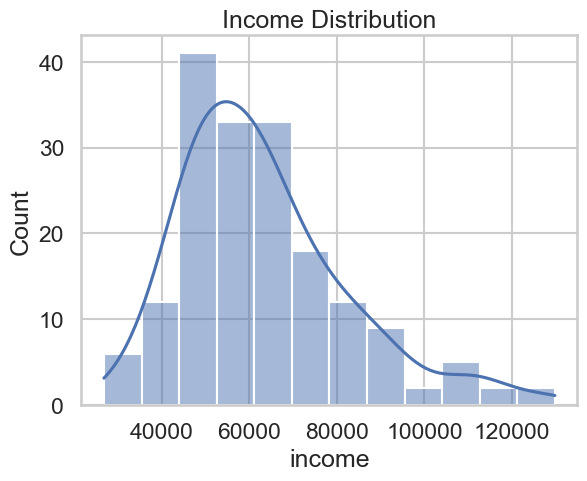

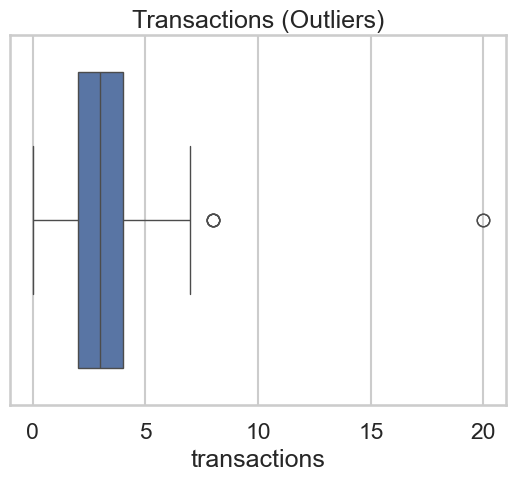

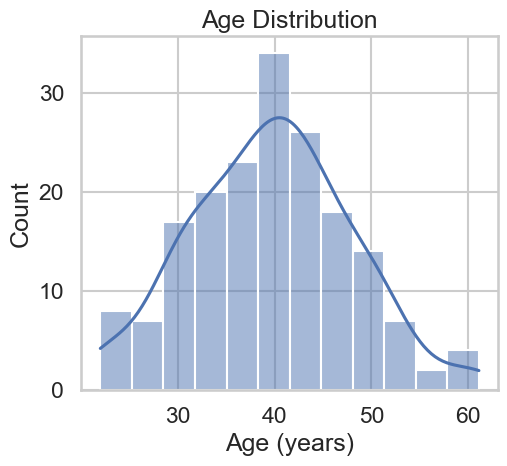

In [20]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()

plt.figure(figsize=(15, 5))


# 2. Age distribution  
plt.subplot(1, 3, 2)
sns.histplot(df['age'], kde=True, bins=12)
plt.title('Age Distribution')
plt.xlabel('Age (years)')

# 3. Transactions with outliers


plt.tight_layout()
plt.show()

## 4) Relationships (TODO: add at least 2)

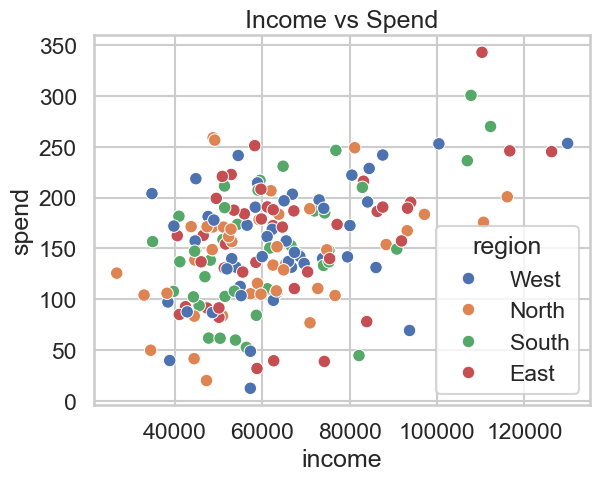

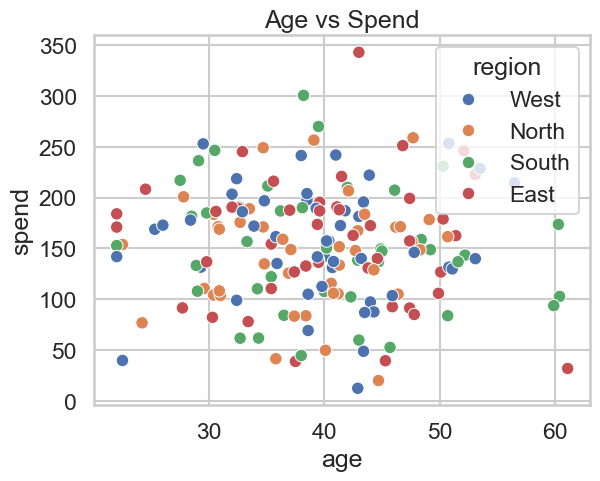

In [23]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend', hue = 'region')
plt.title('Age vs Spend')
plt.show()

## 5) (Optional) Correlation matrix

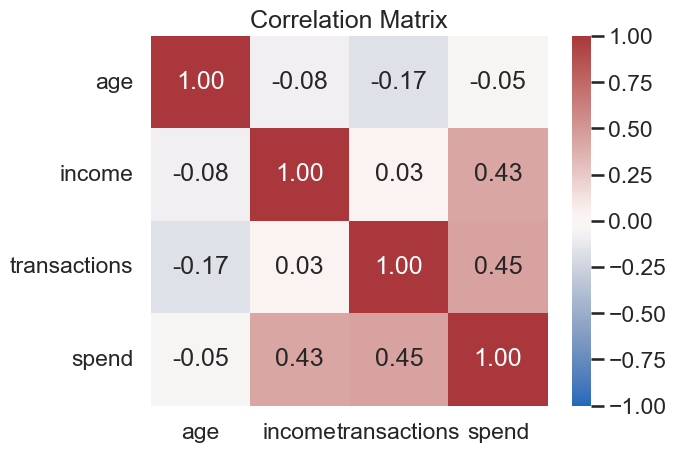

,age,income,transactions,spend
age,1.000000,-0.082830,-0.170822,-0.046231
income,-0.082830,1.000000,0.032852,0.428215
transactions,-0.170822,0.032852,1.000000,0.448358
spend,-0.046231,0.428215,0.448358,1.000000


In [22]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## Top Insights
- Higher income is linked to higher spending  
- Income and spending are skewed, not normally distributed  
- Outliers exist and may impact results  

## Assumptions
- Missing data is random  
- Regional effects are important 

## Risks
- Skewness may affect models  
- Outliers can distort findings  
- Missing data may cause bias  

## Next Steps
- Impute missing values (median)  
- Address outliers (e.g., IQR)